<a href="https://colab.research.google.com/github/putiwindra/putiwindra/blob/main/%5BADW_Tugas4_RB%5DKelompok_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Kelompok 5
Matakuliah : Analisis Deret Waktu
Kelas : RB
a10 -Gas Natural Price
               Price
Month               
1997-01-01       NaN
1997-02-01       NaN
1997-03-01       NaN
1997-04-01       NaN
1997-05-01       NaN
...              ...
2020-04-01  2.237500
2020-05-01  2.163333
2020-06-01  2.099167
2020-07-01  2.049167
2020-08-01  2.055833

[284 rows x 1 columns]                Price
Month               
1997-01-01       NaN
1997-02-01       NaN
1997-03-01       NaN
1997-04-01       NaN
1997-05-01       NaN
...              ...
2020-04-01  0.315022
2020-05-01  0.316410
2020-06-01  0.341160
2020-07-01  0.341826
2020-08-01  0.346212

[284 rows x 1 columns]


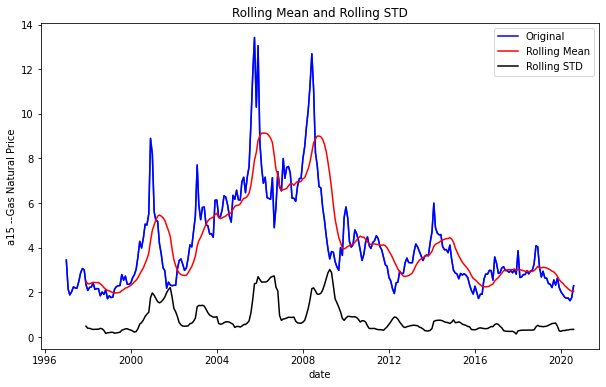

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Results of Dickey-Fuller Test
Test Statistic                 -2.054251
p-value                         0.263304
#Lags Used                      9.000000
Number of Observation Used    274.000000
Critical value (1%)            -3.454444
Critical value (5%)            -2.872147
Critical value (10%)           -2.572422
dtype: float64


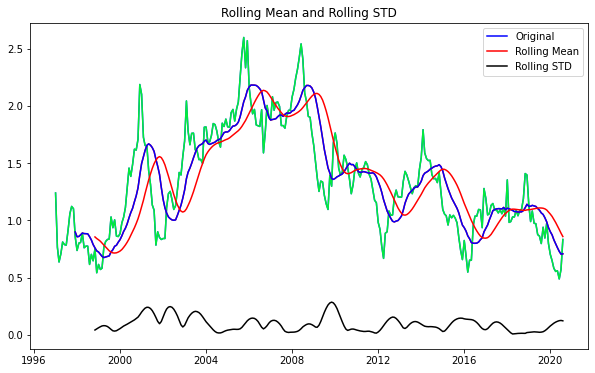

Result of Dickey - Fuller Test :
Test statistic                  -1.539292
p-value                          0.513992
#Lags Used                      16.000000
Number of Observations used    256.000000
Critical Value(1%)              -3.456155
Critical Value(5%)              -2.872897
Critical Value(10%)             -2.572822
dtype: float64


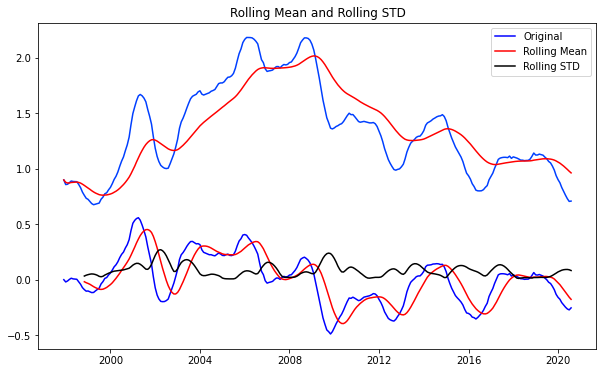

Result of Dickey - Fuller Test :
Test statistic                  -2.241368
p-value                          0.191575
#Lags Used                      16.000000
Number of Observations used    256.000000
Critical Value(1%)              -3.456155
Critical Value(5%)              -2.872897
Critical Value(10%)             -2.572822
dtype: float64


In [ ]:
# -*- coding: utf-8 -*-
"""[ADW 2022_RB_Tugas Kelompok 5]

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/18StKwtywX1i83YNaLXvB1jnlmP6LK7tk
"""

import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
plt.style.use('seaborn-bright') 
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

print('Tugas Kelompok 5')
print('Matakuliah : Analisis Deret Waktu')
print('Kelas : RB')

import pandas as pd

data = {'NIM': [120450020, 120450024, 120450070, 120450072, 120450082, 120450084],
        'Nama': ['Sigit Arryanto','M. Alfin Delvan Joeyantu', 'Puti Windrahmatullah', 'Cania Gisella Br Tarigan', 'Mario Desendi', 'Angga Pramana']
       }

df = pd.DataFrame(data)
df

url =('https://pkgstore.datahub.io/core/natural-gas/monthly_csv/data/139a7e14c803e82e7784bd6b5b473428/monthly_csv.csv')
df = pd.read_csv(url)
df['Month']=pd.to_datetime(df['Month'], infer_datetime_format=True)
indexedDataset= df.set_index(['Month'])

print('a10 -Gas Natural Price')
indexedDataset.head(10)

df = pd.read_csv(url)
df['Month']=pd.to_datetime(df['Month'], infer_datetime_format=True)
indexedDataset= df.set_index(['Month'])
plt.xlabel('date')
plt.ylabel('a15 --Gas Natural Price')
plt.plot(indexedDataset)

#determaine rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

#plot rolling statistics
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling STD')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling STD')
plt.show(block=False)

#Perform Dickey Fuller Test : untuk menguji data stasioner terhadap time series
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test')
dftest= adfuller(indexedDataset['Price'], autolag='AIC')

dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',"Number of Observation Used"])
for key, value in dftest[4]. items():
    dfoutput['Critical value (%s)'%key]=value
print(dfoutput)

#estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

movingAvarage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAvarage, color='red')

datasetlogScaleMinusMovingAvarage = indexedDataset_logScale = movingAvarage
datasetlogScaleMinusMovingAvarage.head(12)

#Remove non value 
datasetlogScaleMinusMovingAvarage.dropna(inplace=True)
datasetlogScaleMinusMovingAvarage.head(12)

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling (window=12).std()

    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color ='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label ='Rolling STD')
    plt.legend(loc='best')
    plt.title("Rolling Mean and Rolling STD")
    plt.show(block=False)

    print('Result of Dickey - Fuller Test :')
    dftest = adfuller(timeseries['Price'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index =['Test statistic', 'p-value','#Lags Used','Number of Observations used'])
    for key, value in dftest [4]. items():
        dfoutput['Critical Value(%s)'%key] = value
    print(dfoutput)

# Transformasi 1 untuk membentuk data stasioner
test_stationarity(datasetlogScaleMinusMovingAvarage)

datasetlogScaleMinusMovingAverage = indexedDataset_logScale - movingAvarage
datasetlogScaleMinusMovingAverage.head(12)

#Remove non value
datasetlogScaleMinusMovingAverage.dropna(inplace=True)
datasetlogScaleMinusMovingAverage.head(10)

exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust= True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)